<a href='https://www.darshan.ac.in/'> <img src='https://www.darshan.ac.in/Content/media/DU_Logo.svg' width="250" height="300"/></a>
<pre>
<center><b><h1>Machine Learning & Deep Learning</b></center>

<center><b><h1>Lab - 5</b></center>    
<pre>    

# SVR

# Importing the libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

# Read World bank CSV

In [2]:
df = pd.read_csv('WorldBank.csv')

In [3]:
df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,India,IND,Export value index (2000 = 100),TX.VAL.MRCH.XD.WD,NaN,NaN,NaN,NaN,NaN,NaN,...,7.147485e+02,7.004085e+02,7.429281e+02,7.614417e+02,6.322694e+02,6.242250e+02,7.061028e+02,7.663608e+02,NaN,NaN
1,India,IND,Insurance and financial services (% of commerc...,TX.VAL.INSF.ZS.WT,NaN,NaN,NaN,NaN,NaN,NaN,...,6.403614e+00,5.246771e+00,5.729495e+00,5.060904e+00,4.706801e+00,4.471147e+00,3.760466e+00,3.921611e+00,3.438072e+00,NaN
2,India,IND,"Merchandise imports by the reporting economy, ...",TM.VAL.MRCH.RS.ZS,4.983551,6.488050e+00,1.012461e+01,9.451370e+00,1.052948e+01,1.089112e+01,...,7.550664e-01,2.738416e-01,4.409538e-01,1.514439e+00,2.228351e+00,2.270593e+00,1.770314e+00,5.354193e-01,NaN,NaN
3,India,IND,Food imports (% of merchandise imports),TM.VAL.FOOD.ZS.UN,NaN,NaN,1.708001e+01,1.519791e+01,1.686304e+01,2.200813e+01,...,3.741041e+00,4.048246e+00,3.895215e+00,4.458509e+00,5.758038e+00,6.505293e+00,6.137617e+00,4.156488e+00,4.248261e+00,NaN
4,India,IND,Share of tariff lines with international peaks...,TM.TAX.MRCH.IP.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,8.434346e+00,8.641136e+00,8.576307e+00,NaN,5.802677e+00,7.707811e+00,8.288774e+00,9.111423e+00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,India,IND,"Foreign direct investment, net inflows (% of GDP)",BX.KLT.DINV.WD.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,2.002065e+00,1.312934e+00,1.516276e+00,1.695659e+00,2.092116e+00,1.937363e+00,1.506588e+00,1.552336e+00,1.760283e+00,NaN
1436,India,IND,"Net capital account (BoP, current US$)",BN.TRF.KOGT.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,6.791581e+07,-5.972328e+08,9.618297e+08,-7.433364e+07,3.706943e+07,1.368359e+08,3.731153e+07,-1.231007e+08,-1.155591e+09,NaN
1437,India,IND,"Travel services (% of service imports, BoP)",BM.GSR.TRVL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,1.761773e+01,1.544257e+01,1.475397e+01,1.799216e+01,1.795378e+01,1.707263e+01,1.686302e+01,1.716750e+01,1.755462e+01,NaN
1438,India,IND,Cereal production (metric tons),AG.PRD.CREL.MT,NaN,8.737650e+07,8.725755e+07,9.037301e+07,9.370600e+07,7.969950e+07,...,2.878600e+08,2.932900e+08,2.949095e+08,2.960100e+08,2.843330e+08,2.978500e+08,3.136100e+08,NaN,NaN,NaN


# Perform conditional selection to find - Population ages 15-64 (% of total population)

In [5]:
data = df[df['Indicator Name'] == 'Population ages 15-64 (% of total population)']
data

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
9,India,IND,Population ages 15-64 (% of total population),SP.POP.1564.TO.ZS,56.49748,56.177532,55.807455,55.461664,55.248939,55.211351,...,64.429404,64.805519,65.208489,65.59598,65.944164,66.274262,66.538187,66.766743,67.003811,NaN


# Divide the data into input and output

In [6]:
X = np.arange(1960, 2020).reshape(-1, 1)

In [7]:
y = data.values[0][4:-1].reshape(-1, 1)

In [8]:
X

array([[1960],
       [1961],
       [1962],
       [1963],
       [1964],
       [1965],
       [1966],
       [1967],
       [1968],
       [1969],
       [1970],
       [1971],
       [1972],
       [1973],
       [1974],
       [1975],
       [1976],
       [1977],
       [1978],
       [1979],
       [1980],
       [1981],
       [1982],
       [1983],
       [1984],
       [1985],
       [1986],
       [1987],
       [1988],
       [1989],
       [1990],
       [1991],
       [1992],
       [1993],
       [1994],
       [1995],
       [1996],
       [1997],
       [1998],
       [1999],
       [2000],
       [2001],
       [2002],
       [2003],
       [2004],
       [2005],
       [2006],
       [2007],
       [2008],
       [2009],
       [2010],
       [2011],
       [2012],
       [2013],
       [2014],
       [2015],
       [2016],
       [2017],
       [2018],
       [2019]])

In [9]:
y

array([[56.49748004],
       [56.17753236],
       [55.80745463],
       [55.46166361],
       [55.24893881],
       [55.21135053],
       [55.09090078],
       [55.15534672],
       [55.34507283],
       [55.57014408],
       [55.78194745],
       [55.85676846],
       [55.95268174],
       [56.07247186],
       [56.23447551],
       [56.44405309],
       [56.49722595],
       [56.62068516],
       [56.78900152],
       [56.9691436],
       [57.1425581],
       [57.18105454],
       [57.22630775],
       [57.28875038],
       [57.39054366],
       [57.54142108],
       [57.55350984],
       [57.6545119],
       [57.81875323],
       [58.01501187],
       [58.22990246],
       [58.37403848],
       [58.5472698],
       [58.75605047],
       [59.012126],
       [59.31657719],
       [59.56507329],
       [59.8572303],
       [60.18600058],
       [60.53971518],
       [60.90862046],
       [61.18898716],
       [61.4993847],
       [61.83084479],
       [62.173897],
       [62.52276485]

# Plot scatter plot of Population ages 15-64 (% of total population)

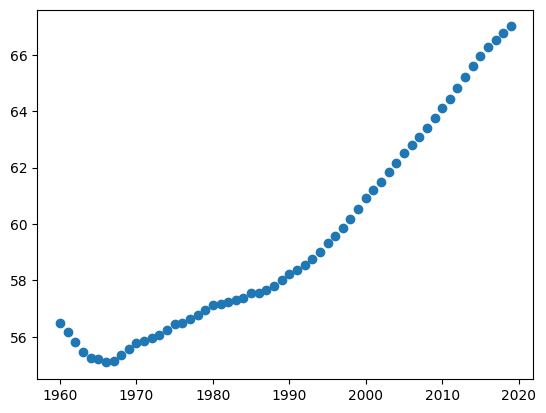

In [10]:
plt.scatter(X, y)

# Feature Scaling (Mandatory for SVR)**
SVR is highly sensitive to the range of data points. If we don't scale (normalize) the data, the model will fail to find the correct hyperplane.

In [11]:
sc_X = StandardScaler()
sc_y = StandardScaler()

In [13]:
X_scaled = sc_X.fit_transform(X)
y_scaled = sc_y.fit_transform(y)

In [14]:
print('Scaling Complete.')

Scaling Complete.


# Splitting the dataset into the Training set and Test set

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.3, random_state=0)

# Fitting SVR on 3 Different Kernel on dataset

In [16]:
model_rbf = SVR()

In [17]:
model_rbf.fit(X_train, y_train.ravel())

,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,1.0
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [21]:
X_grid = np.arange(min(X_test), max(X_test), 1)
X_grid = X_grid.reshape((len(X_grid), 1))

C:\Users\dhair\AppData\Local\Temp\ipykernel_10536\899016245.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X_test), max(X_test), 1)


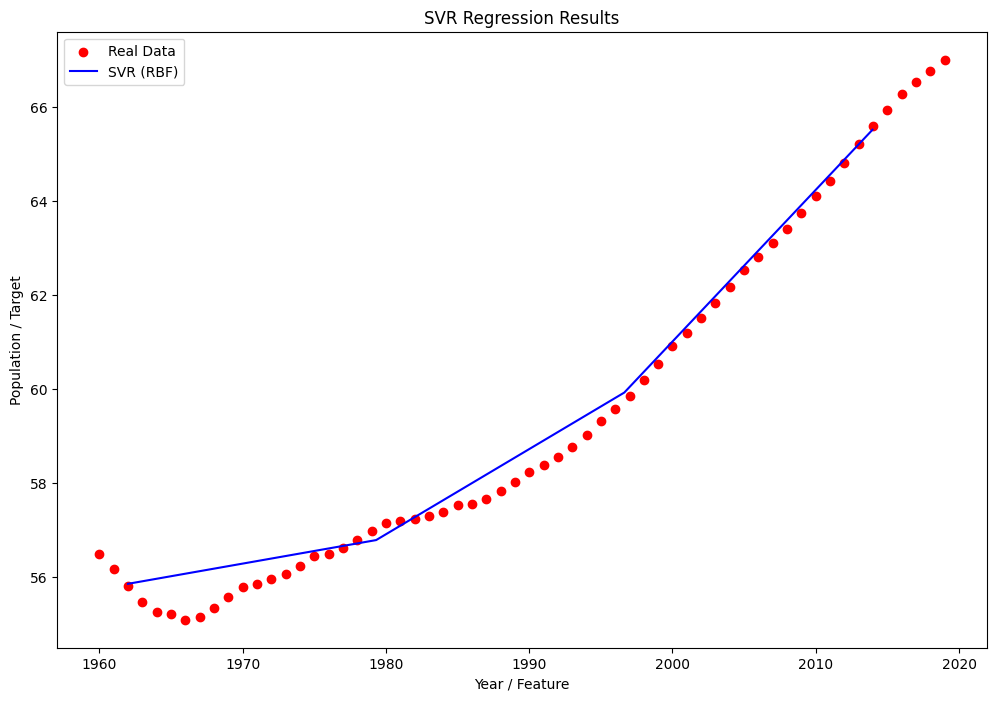

In [27]:
plt.figure(figsize=(12, 8))
plt.scatter(X, y, color='red', label='Real Data')
plt.plot(sc_X.inverse_transform(X_grid), sc_y.inverse_transform(model_rbf.predict(X_grid).reshape(-1, 1)), color='blue', label='SVR (RBF)')

plt.title('SVR Regression Results')
plt.xlabel('Year / Feature')
plt.ylabel('Population / Target')
plt.legend()
plt.show()

# Predict the x_test using 3 Kernel

In [28]:
model_rbf.score(X_train,y_train)

0.9947138713539011

In [31]:
model_rbf.score(X_test,y_test)

0.9880623181593732

array([57.55350984, 59.31657719, 67.00381119, 57.81875323, 55.85676846,
       55.80745463, 59.012126, 66.7667425, 60.90862046, 57.22630775,
       55.24893881, 55.78194745, 58.22990246, 61.18898716, 58.75605047,
       61.83084479, 63.74196691, 55.15534672], dtype=object)

array([57.73445326, 59.30206118, 64.8451716 , 57.99812952, 55.96479236,
       56.12587167, 59.06485884, 64.91876466, 60.76906052, 57.24445561,
       55.93360816, 55.89821768, 58.29641078, 61.1088798 , 58.84682535,
       61.81299688, 63.81278461, 55.81527994])

# Visualising the  results

In [23]:
svr_lin = SVR(kernel='linear')
svr_poly = SVR(kernel='poly', degree=3)
svr_rbf = SVR(kernel='rbf')

In [24]:
svr_lin.fit(X_scaled, y_scaled.ravel())
svr_poly.fit(X_scaled, y_scaled.ravel())
svr_rbf.fit(X_scaled, y_scaled.ravel())

,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,1.0
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


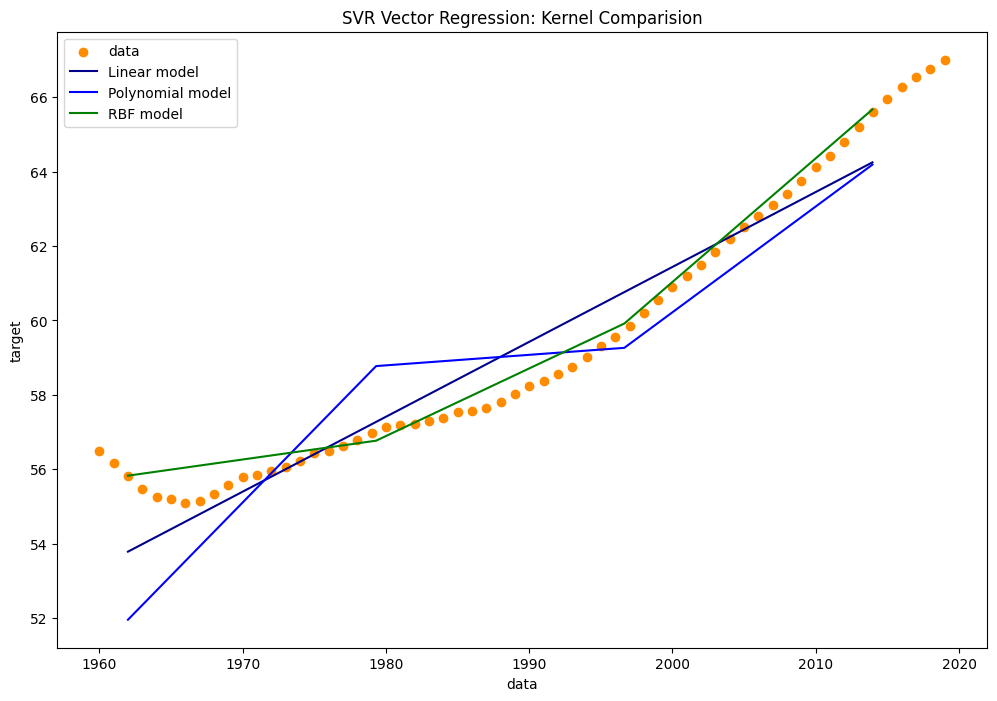

In [26]:
plt.figure(figsize=(12, 8))
plt.scatter(X, y, color='darkorange', label='data')

plt.plot(sc_X.inverse_transform(X_grid), sc_y.inverse_transform(svr_lin.predict(X_grid).reshape(-1, 1)), color='darkblue', label='Linear model')
plt.plot(sc_X.inverse_transform(X_grid), sc_y.inverse_transform(svr_poly.predict(X_grid).reshape(-1, 1)), color='blue', label='Polynomial model')
plt.plot(sc_X.inverse_transform(X_grid), sc_y.inverse_transform(svr_rbf.predict(X_grid).reshape(-1, 1)), color='green', label='RBF model')

plt.title('SVR Vector Regression: Kernel Comparision')
plt.xlabel('data')
plt.ylabel('target')
plt.legend()
plt.show()

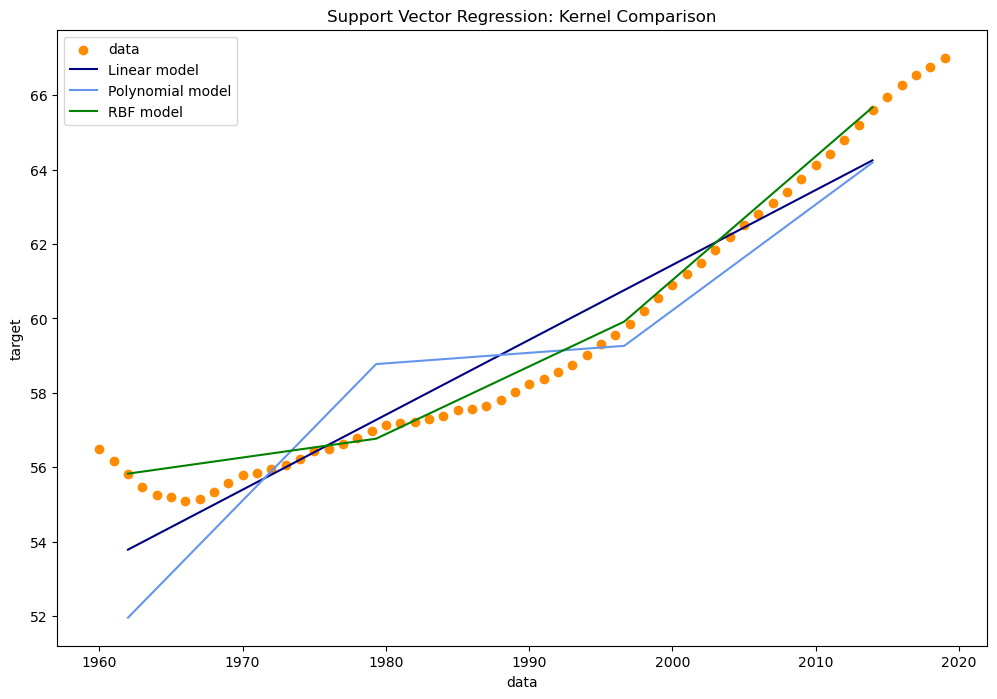

### **Student Activity : Prediction**
**Task:** Predict the value for the Year **2025** (or value 6.5 in the demo data). 
Remember: You must transform the input before predicting, and inverse transform the output.

In [32]:
value_to_predict = [[2025]]
val_scaled = sc_X.transform(value_to_predict)
pred_scaled = svr_lin.predict(val_scaled)
pred_final = sc_y.inverse_transform(pred_scaled.reshape(-1, 1))

In [35]:
print(f'The predicted value for input 2025 is: {pred_final[0][0]:.2f}')

The predicted value for input 2025 is: 66.47
